In [2]:
import os
import pandas as pd
import json
import urllib.request
import urllib.parse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imghdr
from PIL import Image
from random import randint
import tensorflow as tf

In [267]:
%matplotlib inline

In [3]:
BASE_DIR='C:\\Users\\ranu\\Desktop\\projects\\kaggle'
DATA_DIR=os.path.join(BASE_DIR, 'kaggle-data')
COMP_DIR=os.path.join(BASE_DIR, 'imaterialist-challenge-fashion-2018')
COMPETITION_NAME = 'imaterialist-challenge-fashion-2018'
ROOT_DATA_DIR = 'imaterialist-challenge-fashion-2018'
COMPETITION_DATA = 'competition-files'
COMPETITION_FILE_LIST = 'cfiles.csv'
TEST_DATA = 'test'
TRAIN_DATA = 'train'
VAL_DATA = 'validation'
IMAGE_PATH = "imgfiles"
LABEL_FILE = 'lables.csv'

COMP_DATA_DIR=os.path.join(DATA_DIR, ROOT_DATA_DIR, COMPETITION_DATA)
TRAIN_IMAGE_PATH=os.path.join(DATA_DIR, ROOT_DATA_DIR, TRAIN_DATA, IMAGE_PATH)
TEST_IMAGE_PATH=os.path.join(DATA_DIR, ROOT_DATA_DIR, TEST_DATA, IMAGE_PATH)
VAL_IMAGE_PATH=os.path.join(DATA_DIR, ROOT_DATA_DIR, VAL_DATA, IMAGE_PATH)
TRAIN_LABEL_PATH=os.path.join(DATA_DIR, ROOT_DATA_DIR, TRAIN_DATA, LABEL_FILE)
TEST_LABEL_PATH=os.path.join(DATA_DIR, ROOT_DATA_DIR, TEST_DATA, LABEL_FILE)
VAL_LABEL_PATH=os.path.join(DATA_DIR, ROOT_DATA_DIR, VAL_DATA, LABEL_FILE)


In [4]:
#image handling
def ShowImageInfo(path, imgid):
    image_location = os.path.join(path, str(imgid))
    print("File location : ", image_location)
    print("File type : ", imghdr.what(image_location))
    img=mpimg.imread(image_location)
    print("Image shape : ", img.shape)
    plt.imshow(img)
    
def GetAverageXY(path, maxdata, samplesz):
    X = 0
    Y = 0
    for i in range(1, samplesz):
        randsample = randint(1, maxdata-1)
        try:
            image_location = os.path.join(path, str(randsample))
            img=mpimg.imread(image_location)
            sp = img.shape
            X += sp[0]
            Y += sp[1]
        except FileNotFoundError:
            print("Not Found : ", randsample)
        except OSError:
            print("OSError : ", randsample)
    return (X//samplesz, Y//samplesz)

def ImageResize(path, imgid, size_tuple):
    image_path=os.path.join(path, str(imgid))
    ext = imghdr.what(image_path)
    img=Image.open(image_path)
    #img.thumbnail(size_tuple, Image.ANTIALIAS) <-- inplace
    out_img = img.resize(size_tuple)
    out_fname = "test" + "." + ext
    out_img.save(out_fname)
    return mpimg.imread(out_fname)

In [31]:
train_label_df = pd.read_csv(TRAIN_LABEL_PATH)
print(train_label_df.head())

val_label_df = pd.read_csv(VAL_LABEL_PATH)
print(val_label_df.head())

   id                           predicted
0   1                    95 66 137 70 20 
1   2               36 66 44 214 105 133 
2   3              170 66 97 153 105 138 
3   4                   18 66 44 153 164 
4   5  189 66 176 137 153 74 181 171 138 
   id                          predicted
0   1           62 17 66 214 105 137 85 
1   2   95 17 66 214 164 137 20 204 184 
2   3       122 19 66 186 180 44 154 20 
3   4     190 222 66 153 164 226 53 184 
4   5  62 66 153 171 111 137 70 204 184 


File location :  C:\Users\ranu\Desktop\projects\kaggle\kaggle-data\imaterialist-challenge-fashion-2018\train\imgfiles\3
File type :  jpeg
Image shape :  (600, 600, 3)


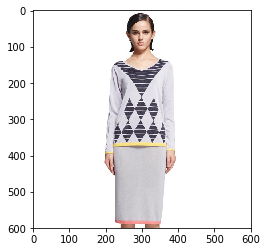

In [245]:
ShowImageInfo(TRAIN_IMAGE_PATH, 3)

In [54]:
GetAverageXY(TRAIN_IMAGE_PATH, len(train_label_df), 1000)

Not Found :  505541
Not Found :  497538
Not Found :  507335
Not Found :  502823
Not Found :  504417
Not Found :  505495
Not Found :  500098
Not Found :  500074
Not Found :  498986
Not Found :  505616
Not Found :  1014393
Not Found :  507298
Not Found :  508823
Not Found :  505049
Not Found :  503235
Not Found :  503815
Not Found :  501760
Not Found :  497326
Not Found :  504049
Not Found :  499355


(544, 522)

File location :  C:\Users\ranu\Desktop\projects\kaggle\kaggle-data\imaterialist-challenge-fashion-2018\train\imgfiles\3
File type :  jpeg
Image shape :  (600, 600, 3)


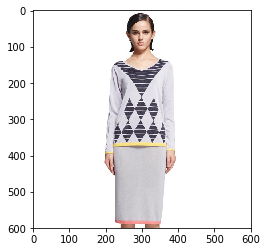

In [160]:
imgae_id = 3
new_size = (512, 512)
ShowImageInfo(TRAIN_IMAGE_PATH, imgae_id)
img_rsz = ImageResize(TRAIN_IMAGE_PATH, imgae_id, new_size)

(512, 512, 3)


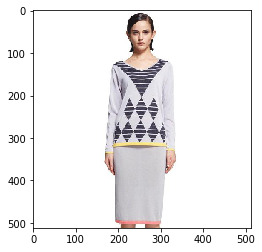

In [161]:
print(img_rsz.shape)
plt.imshow(img_rsz)

In [32]:
print("# of samples in train dataset : ", len(train_label_df))
print("# of samples in validation dataset : ", len(train_label_df))

# of samples in train dataset :  1014544
# of samples in validation dataset :  9897


In [44]:
classes = set([])

for i in range(2):
    classes.update(set([int(labnum) for labnum in train_label_df['predicted'][i].split()]))
    
for i in range(2):
    classes.update(set([int(labnum) for labnum in val_label_df['predicted'][i].split()]))
    
classes

{17, 20, 36, 44, 62, 66, 70, 85, 95, 105, 133, 137, 164, 184, 204, 214}

In [46]:
multilabel_classes = set([])

for i in range(len(train_label_df)):
    multilabel_classes.update(set([int(labnum) for labnum in train_label_df['predicted'][i].split()]))
    
for i in range(len(val_label_df)):
    multilabel_classes.update(set([int(labnum) for labnum in val_label_df['predicted'][i].split()]))
    
multilabel_classes

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [47]:
print(min(multilabel_classes))
print(max(multilabel_classes))

1
228


In [53]:
def getMultiLabelBinarizer(lab_list, max_class=256):
    retval = [0]*max_class
    for n in lab_list:
        retval[n] = 1
    return retval

In [233]:
# getMultiLabelBinarizer([1,4,77], 228)

In [13]:
for i in range(1, 5):
    print(os.path.join(TRAIN_IMAGE_PATH, str(i)))
    print(train_label_df['predicted'][i-1].split())

C:\Users\ranu\Desktop\projects\kaggle\kaggle-data\imaterialist-challenge-fashion-2018\train\imgfiles\1
['95', '66', '137', '70', '20']
C:\Users\ranu\Desktop\projects\kaggle\kaggle-data\imaterialist-challenge-fashion-2018\train\imgfiles\2
['36', '66', '44', '214', '105', '133']
C:\Users\ranu\Desktop\projects\kaggle\kaggle-data\imaterialist-challenge-fashion-2018\train\imgfiles\3
['170', '66', '97', '153', '105', '138']
C:\Users\ranu\Desktop\projects\kaggle\kaggle-data\imaterialist-challenge-fashion-2018\train\imgfiles\4
['18', '66', '44', '153', '164']


In [119]:
# tensorflow image handling : DataSet

# Reads an image from a file, decodes it into a dense tensor, and resizes it
# to a fixed shape.

def _parse_function(filename, label):
    image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string)
    image_resized = tf.image.resize_images(image_decoded, [512, 512])
    return image_resized, label

In [147]:
def _parse_function_matplotlib(filename, label):
    img=Image.open(tf.as_string(filename))
    out_img = img.resize((512, 512))
    return tf.convert_to_tensor(out_img), label

In [324]:
def _read_py_function(filename, label):
    image_decoded = Image.open(filename.decode())
    image_resized = image_decoded.resize((512, 512))
    return image_resized, label

# Use standard TensorFlow operations to resize the image to a fixed shape.
def _resize_function(image_decoded, label):
    image_decoded.set_shape([512, 512, 3])
    image_resized = tf.image.resize_images(image_decoded, [512, 512])
    return tf.cast(tf.convert_to_tensor(image_resized), dtype=tf.float32), label

In [325]:
fnames = []
flabels = []

for i in range(1, 5):
    fnames.append(os.path.join(TRAIN_IMAGE_PATH, str(i)))
    flabels.append(
        getMultiLabelBinarizer(
            [int(labnum) for labnum in train_label_df['predicted'][i-1].split()]
        ))

In [234]:
# print(fnames, flabels)

In [326]:
# A vector of filenames.
filenames = tf.constant(fnames)
# `labels[i]` is the label for the image in `filenames[i].
labels = tf.constant(flabels)


In [327]:
dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
#dataset = dataset.map(_parse_function)
dataset = dataset.map(
    lambda filename, label: tuple(tf.py_func(
        _read_py_function, [filename, label], [tf.uint8, label.dtype])))
dataset = dataset.map(_resize_function)


In [329]:
print(dataset.output_types)
print(dataset.output_shapes)

(tf.float32, tf.int32)
(TensorShape([Dimension(512), Dimension(512), Dimension(3)]), TensorShape(None))


In [330]:
dataset = dataset.shuffle(buffer_size=10)
batched_dataset = dataset.batch(2)
iterator = batched_dataset.make_initializable_iterator()
next_element = iterator.get_next()
sess = tf.Session()
#my_img = tf.image.decode_jpeg(next_element[0])
plot_img = []
lab_img = []

for _ in range(2):
    sess.run(iterator.initializer)
    while True:
        try:
            values = sess.run(next_element)
            #print(values[1][1])
            #print("======================================")
            plot_img.append(values[0][0])
            plot_img.append(values[0][1])
            lab_img.append(values[1][0])
            lab_img.append(values[1][1])
            #plt.imshow(value[0])
        except tf.errors.OutOfRangeError:
            break
        except Exception as e:
            print(e)
            break
sess.close()

In [331]:
print(type(plot_img[2]))
print(plot_img[2].shape)

<class 'numpy.ndarray'>
(512, 512, 3)


In [332]:
plot_img[2]

array([[[244., 235., 230.],
        [244., 235., 230.],
        [244., 235., 230.],
        ...,
        [224., 215., 208.],
        [224., 215., 208.],
        [224., 215., 208.]],

       [[244., 235., 230.],
        [244., 235., 230.],
        [244., 235., 230.],
        ...,
        [223., 214., 207.],
        [223., 214., 207.],
        [223., 214., 207.]],

       [[244., 235., 230.],
        [244., 235., 230.],
        [244., 235., 230.],
        ...,
        [222., 213., 206.],
        [222., 213., 206.],
        [222., 213., 206.]],

       ...,

       [[143., 114.,  98.],
        [138., 109.,  93.],
        [140., 111.,  97.],
        ...,
        [118.,  86.,  73.],
        [113.,  81.,  68.],
        [112.,  80.,  67.]],

       [[143., 114.,  98.],
        [138., 109.,  93.],
        [140., 111.,  97.],
        ...,
        [122.,  90.,  77.],
        [115.,  83.,  70.],
        [111.,  79.,  66.]],

       [[143., 114.,  98.],
        [138., 109.,  93.],
        [140., 1

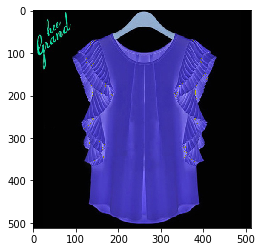

In [333]:
plt.imshow(plot_img[1])

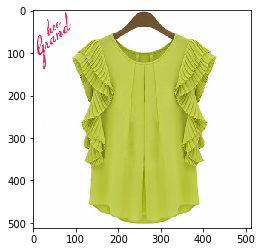

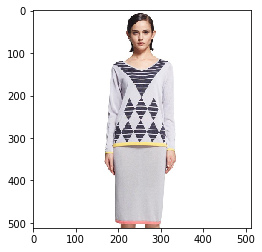

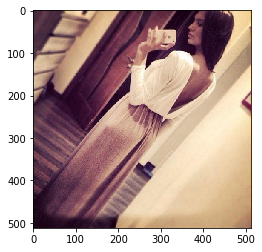

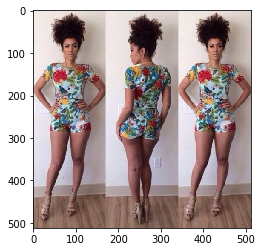

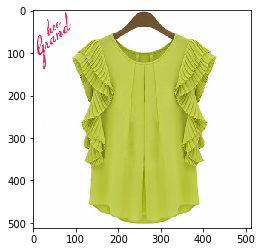

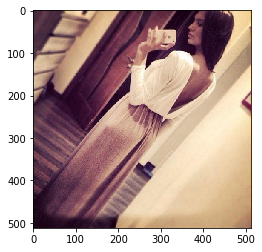

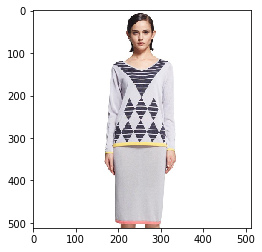

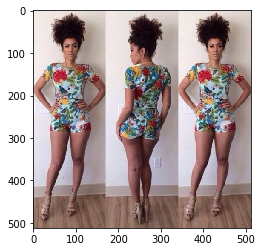

In [268]:
for imgarray in plot_img:
    plt.figure()
    plt.imshow(imgarray)

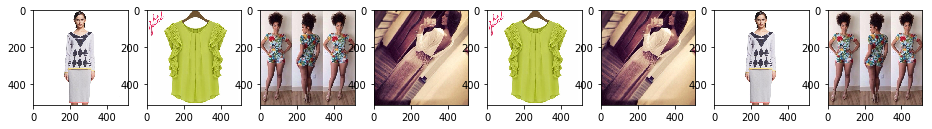

In [336]:
plt.figure(figsize=(20,10))
columns = 10
for i, image in enumerate(plot_img):
    plt.subplot(len(plot_img) / columns + 1, columns, i + 1)
    plt.imshow(image.astype(np.uint8))

In [208]:
print(type(lab_img[2]))
print(lab_img[2].shape)
print(lab_img[2])

<class 'numpy.ndarray'>
(256,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [86]:
plot_img[0].shape

(512, 512, 3)

In [1]:
import time
time.time.now()

AttributeError: 'builtin_function_or_method' object has no attribute 'now'